# Time series Visualizations

Since the data is categorical majorly, we decided to use stacked area plot, PLOT 2 and PLOT 3 for easy understanding of the data.

In [1]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_merged_dataset.csv") # Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong
df.sample(7)

,mbti,character,movie_name,release_year,genre,revenue,score,metascore
1604,ISTJ,Saunders,James Bond,2015.0,"Action, Comedy",NaN,5.4,NaN
2736,ENTJ,Elliot,Dead Ringers,2002.0,Comedy,NaN,7.6,NaN
1187,ESFP,Gobber,How To Train Your Dragon,2010.0,"Action, Adventure",NaN,8.3,NaN
1202,ISFP,Fishlegs,How To Train Your Dragon,2010.0,"Action, Adventure",NaN,8.3,NaN
2084,ESFP,Bert,Cabin Fever,2016.0,"Horror, Sci-Fi, Thriller",NaN,3.7,14.0
335,ESTP,Liza,68 Kill,2017.0,"Comedy, Crime, Romance",NaN,6.0,56.0
105,ISFJ,Lovat Ghost Girl,Coraline,2009.0,"Action, Adventure, Fantasy",NaN,7.6,NaN


## PLOT 1: Frequency of each MBTI main type over the years

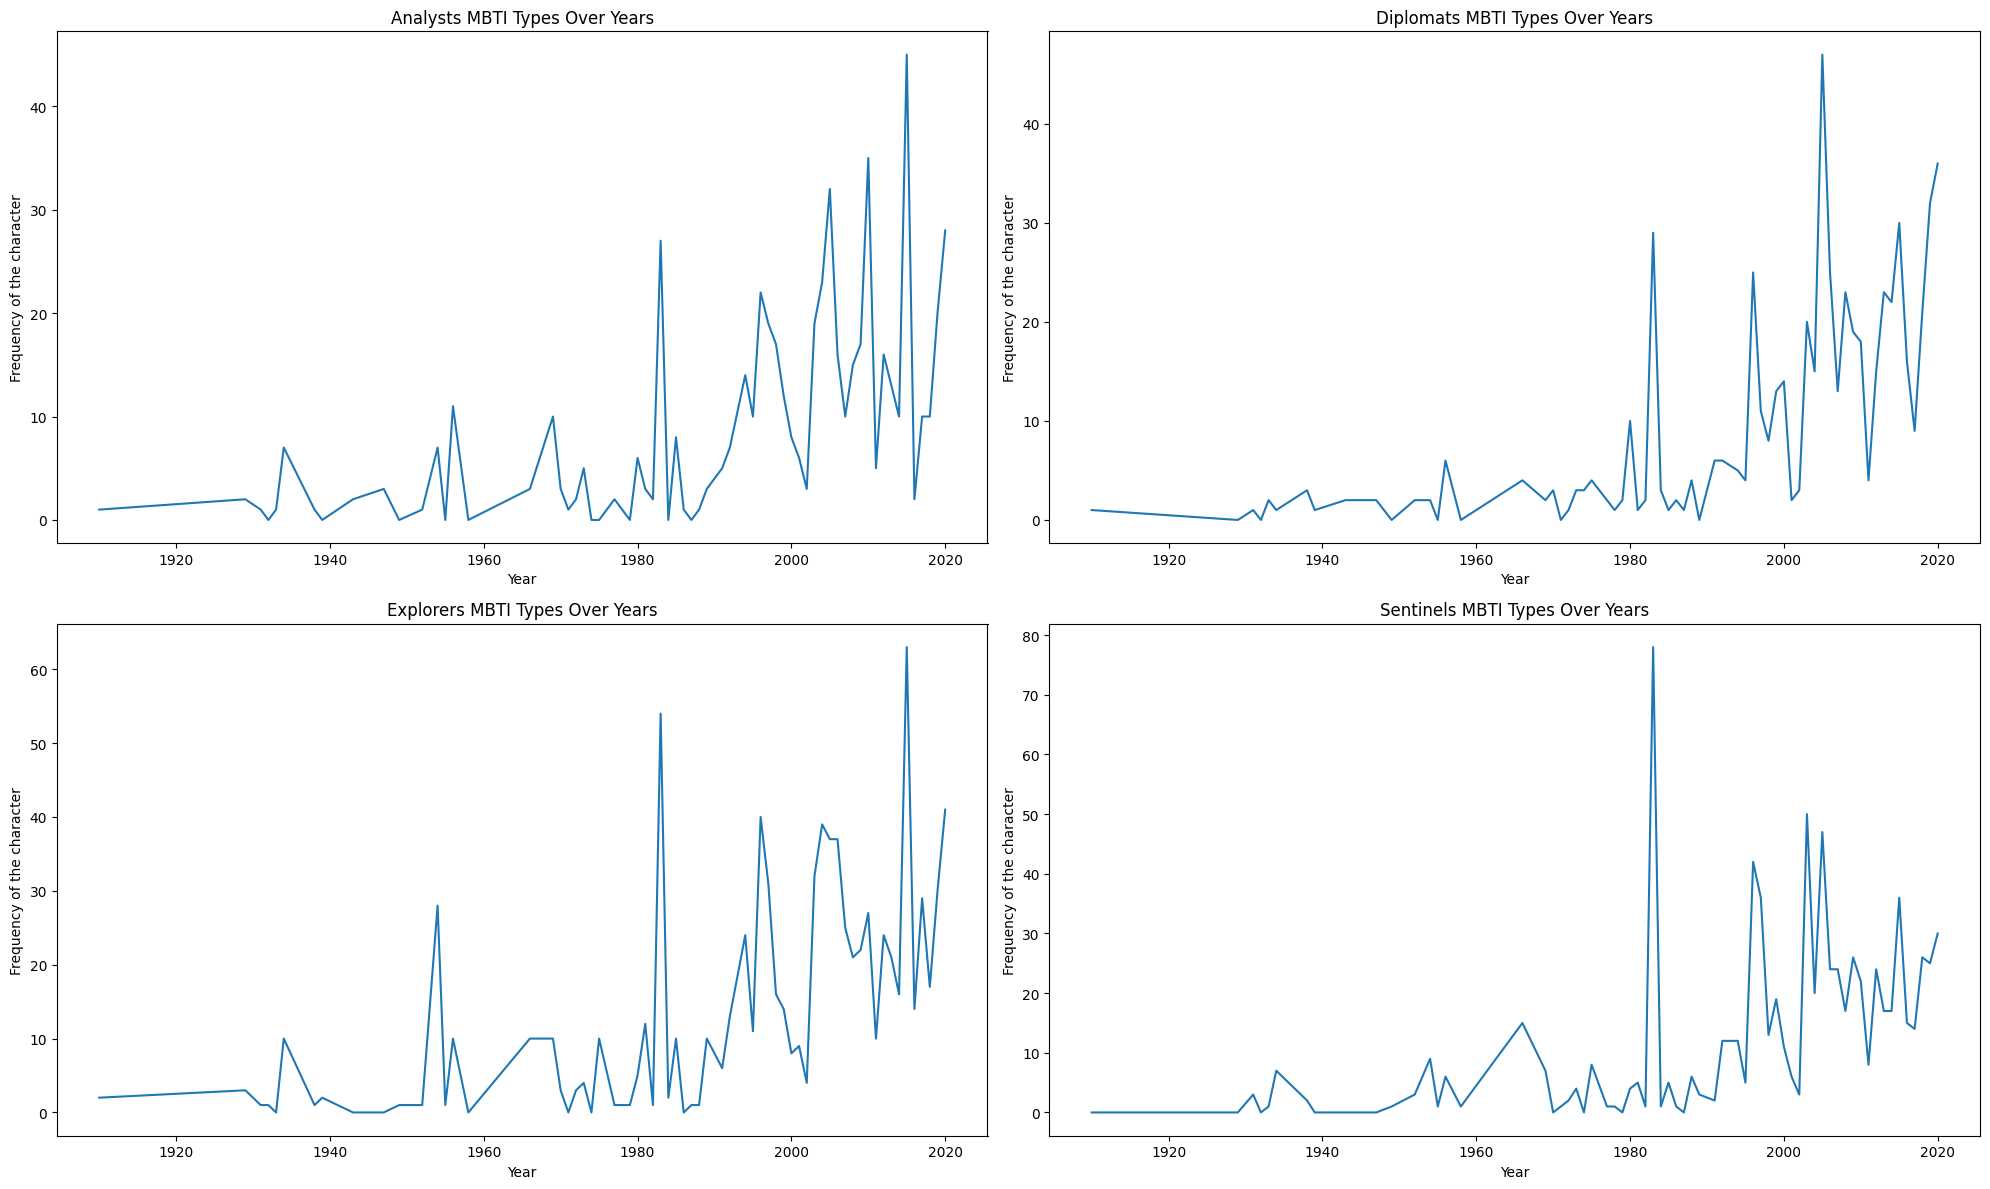

In [12]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong.

# Frequency of each MBTI type over the years
# The 4 main types from the 16personalities website are: Analysts, Diplomats, Sentinels, Explorers
# Mapping the MBTI types to the main types as per the 16personalities classification
mbti_mapping = {
    'INTJ': 'Analysts', 'INTP': 'Analysts', 'ENTJ': 'Analysts', 'ENTP': 'Analysts',
    'INFJ': 'Diplomats', 'INFP': 'Diplomats', 'ENFJ': 'Diplomats', 'ENFP': 'Diplomats',
    'ISTJ': 'Sentinels', 'ISFJ': 'Sentinels', 'ESTJ': 'Sentinels', 'ESFJ': 'Sentinels',
    'ISTP': 'Explorers', 'ISFP': 'Explorers', 'ESTP': 'Explorers', 'ESFP': 'Explorers'
}

# Adding a column for the main type
df['main_type'] = df['mbti'].map(mbti_mapping)

# Grouping by year and main type, then counting the occurrences
year_main_type_counts = df.groupby(['release_year', 'main_type']).size().unstack(fill_value=0)

# Plotting time series for each main type
plt.figure(figsize=(20, 12))

for i, main_type in enumerate(year_main_type_counts.columns):
    plt.subplot(2, 2, i+1)
    year_main_type_counts[main_type].plot(title=f'{main_type} MBTI Types Over Years')
    plt.xlabel('Year')
    plt.ylabel('Frequency of the character')
    

plt.tight_layout()
plt.show()




# PLOT 2 :Average Movie Score by Year

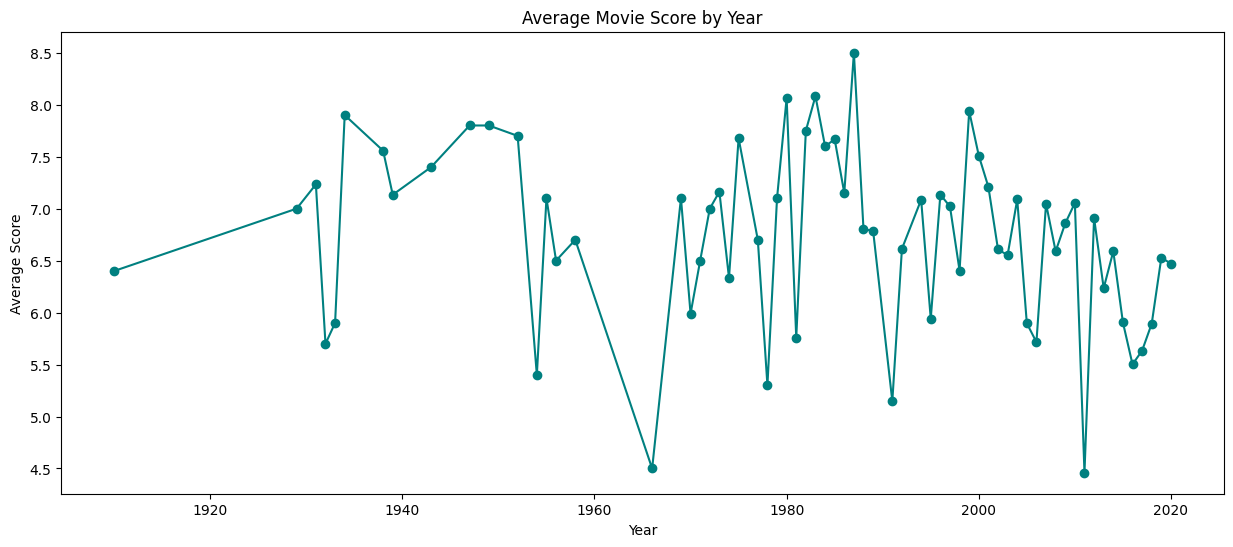

In [4]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Average Movie Score by Year
# Calculating the average movie score by year
average_score_by_year = df.groupby('release_year')['score'].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(15, 6))
average_score_by_year.plot(kind='line', color='teal', marker='o', ax=ax)
ax.set_title('Average Movie Score by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Score')

plt.show()


# PLOT 3: Annual Movie Revenue Trend - Line Chart

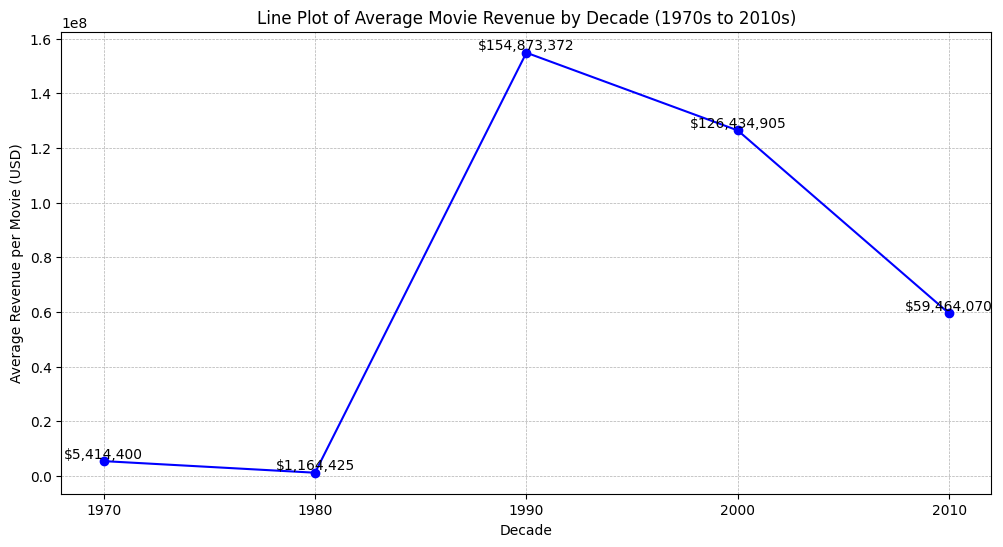

In [18]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong 
# Create a new column 'decade' that groups the 'release_year' into decades
df['decade'] = (df['release_year'] // 10) * 10

# Filter the data to include only the years from 1970 to 2010
df_filtered = df[(df['decade'] >= 1970) & (df['decade'] <= 2010)]

# Calculate the average revenue per movie for each decade
average_revenue_per_movie_decade = df_filtered.groupby('decade')['revenue'].mean()

# Replace NaN or infinite values with zero
average_revenue_per_movie_decade.replace([np.inf, -np.inf], np.nan, inplace=True)
average_revenue_per_movie_decade.fillna(0, inplace=True)

# Plotting the line plot
plt.figure(figsize=(12, 6))
plt.plot(average_revenue_per_movie_decade.index, average_revenue_per_movie_decade.values, marker='o', color='b', linestyle='-')

# Annotate each point with its value
for x, y in zip(average_revenue_per_movie_decade.index, average_revenue_per_movie_decade.values):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom')

plt.title('Line Plot of Average Movie Revenue by Decade (1970s to 2010s)')
plt.xlabel('Decade')
plt.ylabel('Average Revenue per Movie (USD)')
plt.xticks(average_revenue_per_movie_decade.index)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()







# PLOT 4: Selecting the top 5 MBTI types for the bump chart

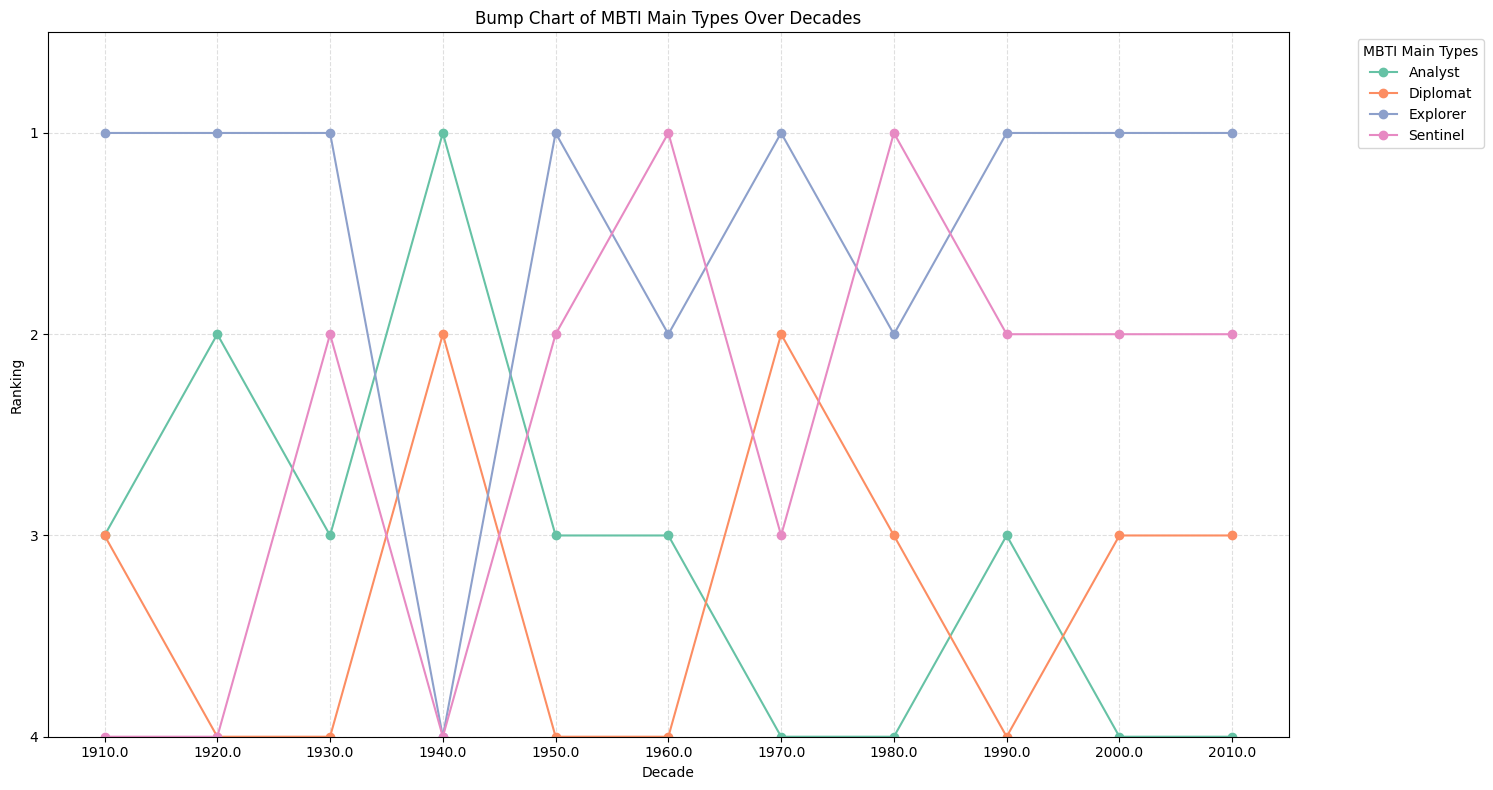

In [20]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong. 
# Mapping MBTI types to main types and creating a 'decade' column
main_type_mapping = {
    'Analyst': ['INTJ', 'INTP', 'ENTJ', 'ENTP'],
    'Diplomat': ['INFJ', 'INFP', 'ENFJ', 'ENFP'],
    'Sentinel': ['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ'],
    'Explorer': ['ISTP', 'ISFP', 'ESTP', 'ESFP']
}
mbti_to_main = {mbti: main for main, mbtis in main_type_mapping.items() for mbti in mbtis}
df['main_type'] = df['mbti'].map(mbti_to_main)
df['decade'] = (df['release_year'] // 10) * 10

# Grouping by decade and main type, then counting occurrences
decade_main_type_counts = df.groupby(['decade', 'main_type']).size().unstack(fill_value=0)

# Calculate the rankings for each main type per decade
rankings = decade_main_type_counts.rank(axis=1, method='max', ascending=False)

# Setting up the figure for the bump chart
fig, ax = plt.subplots(figsize=(15, 8))

# Color palette for the lines
colors = sns.color_palette("Set2", len(rankings.columns))

# Plotting each main type with a unique color and marker
for i, main_type in enumerate(rankings.columns):
    ax.plot(rankings.index, rankings[main_type], label=main_type, marker='o', color=colors[i], linestyle='-')

# Setting the y-axis to show rankings with a reversed order so 1 is at the top
ax.set_ylim(len(rankings.columns), 0.5)
ax.set_yticks(range(1, len(rankings.columns) + 1))
ax.set_yticklabels(range(1, len(rankings.columns) + 1))

# Setting the x-axis to show decades
ax.set_xticks(rankings.index)
ax.set_xticklabels(rankings.index)

# Grid and title settings
ax.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_title('Bump Chart of MBTI Main Types Over Decades')
ax.set_xlabel('Decade')
ax.set_ylabel('Ranking')

# Legend outside the plot
ax.legend(title='MBTI Main Types', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



# PLOT 5 : Selecting the top 5 MBTI types for the slope chart

/var/folders/0n/qqmnpgh93cd_z3ptl2h4znxw0000gn/T/ipykernel_20026/1257412854.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set2', len(top_mbti_types))


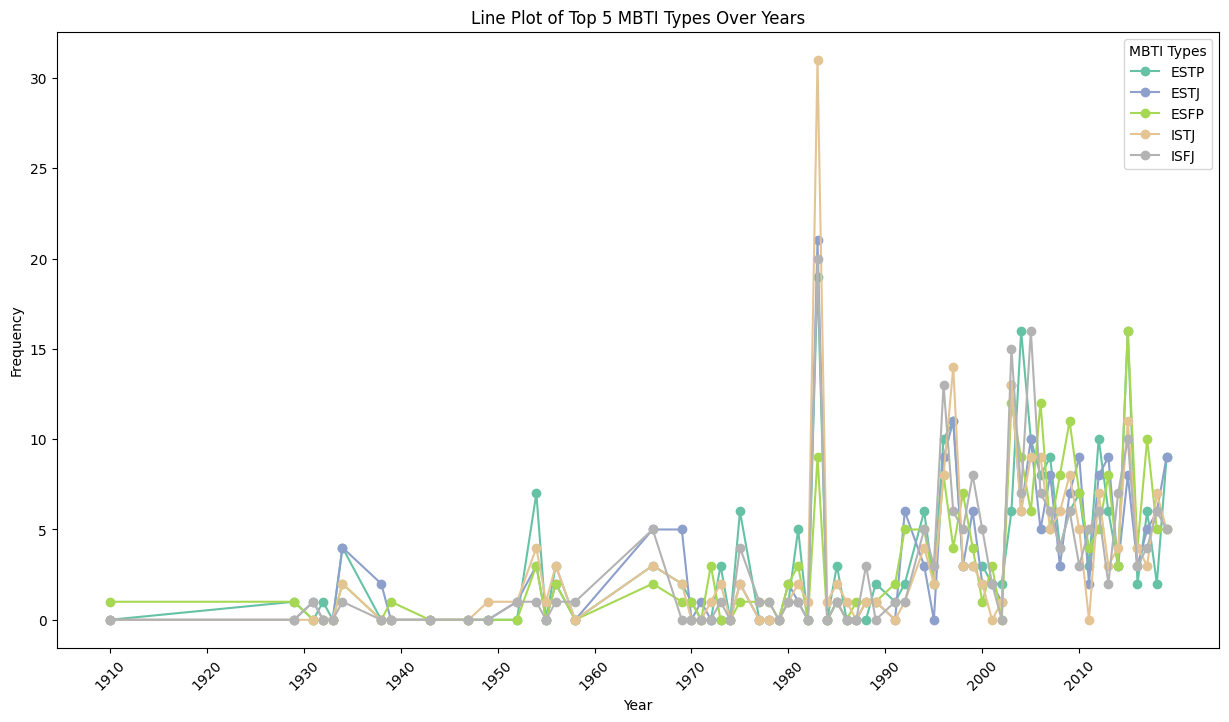

In [23]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong - change it from after 1970
# Grouping by year and MBTI type, then counting the occurrences
mbti_counts = df.groupby(['release_year', 'mbti']).size().unstack(fill_value=0)

# Selecting the top 5 most common MBTI types for the plot
top_mbti_types = mbti_counts.sum().sort_values(ascending=False).head(5).index

# Define a distinct but not too light color palette for the top 5 MBTI types
colors = plt.cm.get_cmap('Set2', len(top_mbti_types))

# Plotting a line chart for each of the top 5 MBTI types with distinct colors
fig, ax = plt.subplots(figsize=(15, 8))
for i, mbti_type in enumerate(top_mbti_types):
    ax.plot(mbti_counts.index, mbti_counts[mbti_type], label=mbti_type, marker='o', color=colors(i))

# Setting x-ticks to be one decade apart
decade_ticks = np.arange(mbti_counts.index.min(), mbti_counts.index.max() + 1, 10)
ax.set_xticks(decade_ticks)

ax.set_title('Line Plot of Top 5 MBTI Types Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.legend(title='MBTI Types')
plt.xticks(rotation=45)
plt.show()





# PLOT 6 : Genre vs Year 

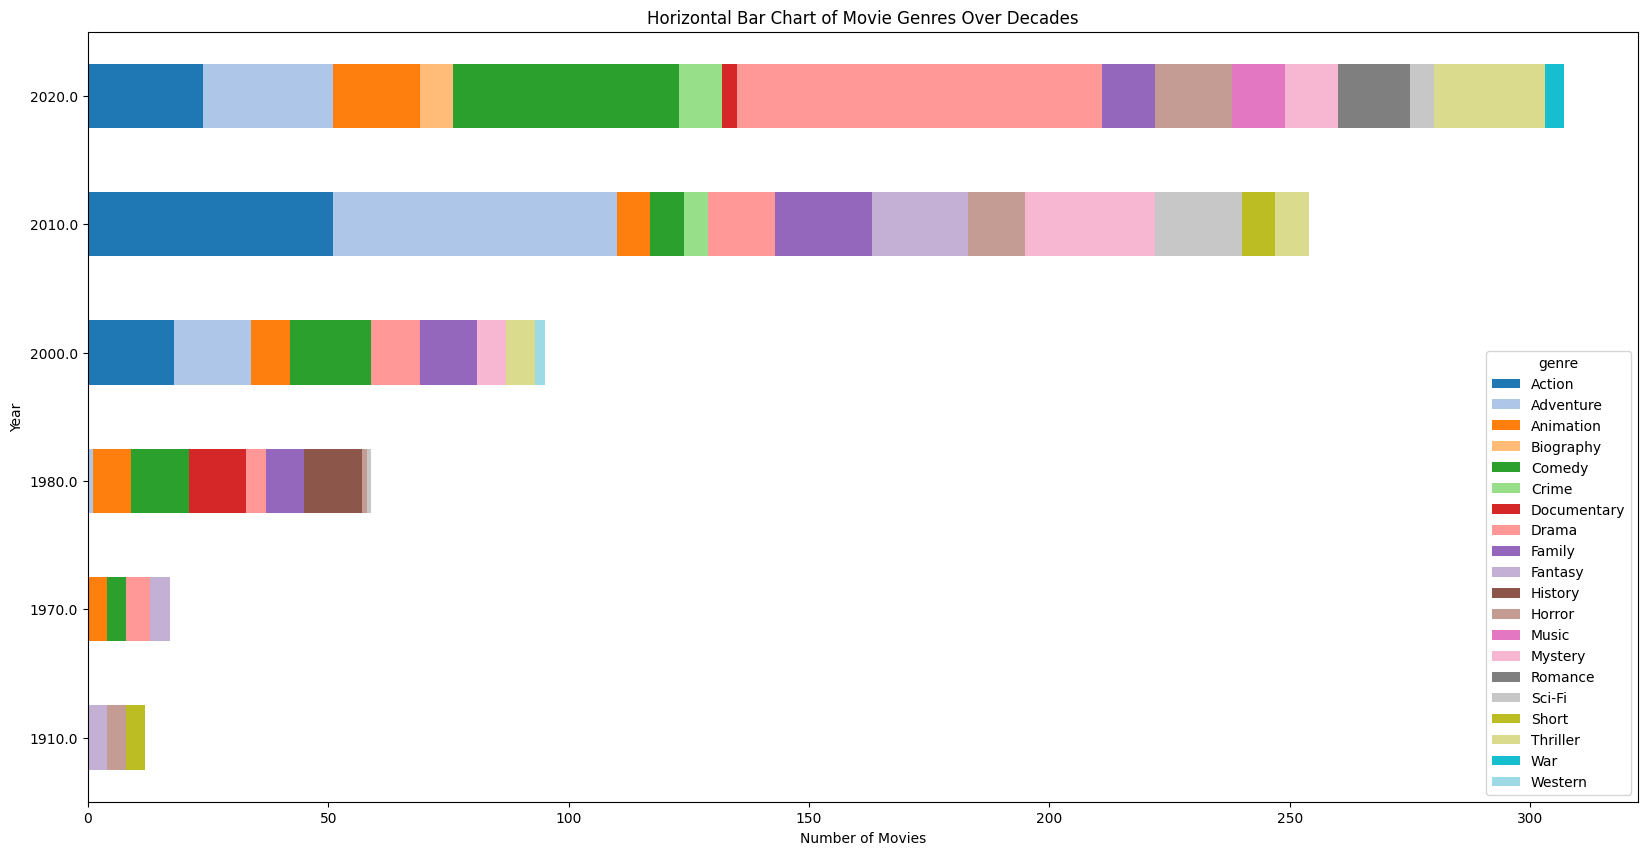

In [8]:
# Coded by Sai Nandini. Reviewed, tested and corrected by Daniel, Yitian, and Xiatong

# Splitting genres into individual genres for each movie
df_expanded_genre_year = df.drop('genre', axis=1).join(
    df['genre'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
)

# Filtering the data for years with a decade gap
decade_gap_years = np.arange(df['release_year'].min(), df['release_year'].max() + 1, 10)
genre_year_data_decade = df_expanded_genre_year[df_expanded_genre_year['release_year'].isin(decade_gap_years)]

# Grouping by year and genre and counting occurrences
genre_year_counts = genre_year_data_decade.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Plotting a horizontal bar chart for each genre
fig, ax = plt.subplots(figsize=(20, 10))
genre_year_counts.plot(kind='barh', stacked=True, ax=ax, colormap='tab20')
ax.set_title('Horizontal Bar Chart of Movie Genres Over Decades')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Year')
plt.show()
